<a href="https://colab.research.google.com/github/Ajied21/IndonesiaTrendingonYouTube/blob/main/indonesian_trending_youtube_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Indonesia's Trending YouTube Video Statistics

###Introduction :
YouTube provide trending videos to help viewer's see what's happening on YouTube and in the world. To do this, some measures like view count, how quickly the video is generating views (hotness), views origin (including outside YouTube), the age of the videos, etc., are to be accounted.

Trending on YouTube isn't personalized and hence display the same list of videos to users in a country. The list of trending videos is updated roughly every 15 minutes in which each update, videos may move up, down, or stay in the same position in the list.

### Import Relevant Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

### Read

In [ ]:
pd.options.display.max_columns=999 # max size columns display at jupyter notebook
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/trending.csv',low_memory=False) # read file
df.sample(5) #shows 5 random samples

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
16327,NaN,2021-06-01T14:47:18Z,UC8ll9BB0vLLCmCEDXLhJLoQ,TIDAK DISANGKA! Bilqis Pandai Berbahasa Inggri...,Kece deh kecil kecil udah cantik pintar nyanyi...,NaN,NaN,NaN,Rising Star Indonesia Dangdut,"['Rising Star Indonesia', 'Rising Star Indones...",10,none,TIDAK DISANGKA! Bilqis Pandai Berbahasa Inggri...,Kece deh kecil kecil udah cantik pintar nyanyi...,PT6M4S,2d,hd,False,True,NaN,NaN,5147804.0,101234.0,5557.0,0,6834.0,2021-06-06 06:01:05.451830+00:00
15361,NaN,2021-05-30T11:53:49Z,UCbJWkrWIB4W-oR-cOASEBsQ,Boruto Episode 201 Sub Indo Terbaru PENUH FULL...,Boruto Episode 201 Sub Indo Terbaru | Boruto 2...,NaN,NaN,NaN,V Movies,NaN,1,none,Boruto Episode 201 Sub Indo Terbaru PENUH FULL...,Boruto Episode 201 Sub Indo Terbaru | Boruto 2...,PT24M20S,2d,hd,False,True,"['ID', 'MY']",NaN,1260286.0,21717.0,1056.0,0,1824.0,2021-06-01 06:01:29.285643+00:00
35125,NaN,2021-09-01T03:50:41Z,UCIqzqfsgUqctbM-MANntwuQ,Mati rusa 🤣 #Shorts,NaN,NaN,NaN,NaN,Putih Abu-Abu,NaN,10,none,Mati rusa 🤣 #Shorts,NaN,PT1M,2d,hd,False,False,NaN,NaN,9223723.0,278253.0,13369.0,0,1833.0,2021-09-08 06:00:51.924509+00:00
76074,FimLH7gd0xE,2022-03-23T09:21:47Z,UCplJmnOkqH9tisNhkF6hWEA,Mitos mana nih yg pernah kalian dengerr??😂,NaN,https://i.ytimg.com/vi/FimLH7gd0xE/hqdefault.jpg,480.0,360.0,Sptrakori_Official,NaN,22,none,Mitos mana nih yg pernah kalian dengerr??😂,NaN,PT58S,2d,hd,False,False,NaN,NaN,5331197.0,342479.0,NaN,0,2089.0,2022-04-05 06:03:53.077938+00:00
57056,mspcjQqjyiQ,2021-12-17T06:00:08Z,UCepgnl-TtJ8DurHdC6EE22w,GLAMPING ROMANTIC DINNER,Pasti kalian lagi baca surat cinta dari aku ha...,https://i.ytimg.com/vi/mspcjQqjyiQ/hqdefault.jpg,480.0,360.0,Ria SW,NaN,24,none,GLAMPING ROMANTIC DINNER,Pasti kalian lagi baca surat cinta dari aku ha...,PT11M48S,2d,hd,False,True,NaN,NaN,865486.0,72522.0,NaN,0,1726.0,2021-12-27 06:01:35.597683+00:00


### Data Cleaning

In [ ]:
df.columns #check for columns values

Index(['video_id', 'publish_time', 'channel_id', 'title', 'description',
       'thumbnail_url', 'thumbnail_width', 'thumbnail_height', 'channel_name',
       'tags', 'category_id', 'live_status', 'local_title',
       'local_description', 'duration', 'dimension', 'definition', 'caption',
       'license_status', 'allowed_region', 'blocked_region', 'view', 'like',
       'dislike', 'favorite', 'comment', 'trending_time'],
      dtype='object')

In [ ]:
df = df.drop(['video_id','channel_id','thumbnail_url','thumbnail_width','thumbnail_height','category_id','live_status','local_title','local_description','dimension','license_status','allowed_region','blocked_region','favorite','caption','definition','trending_time','tags','description'],axis=1) # drop some columns

In [ ]:
df.isna().sum() #check for null

publish_time        0
title               0
channel_name        0
duration            0
view               10
like              758
dislike         23983
comment           377
dtype: int64

In [ ]:
df = df.dropna() # drop the null
df.shape

(53401, 8)

In [ ]:
df = df.sort_values('view',ascending=False).drop_duplicates(subset=['title','channel_name'],keep='first')
df.shape

(11195, 8)

### Feature engineering

In [ ]:
df2 = df.copy()
df2.sample(2)

,publish_time,title,channel_name,duration,view,like,dislike,comment
23089,2021-07-05T12:00:11Z,HALU - FEBY PUTRI FT. INDOMUSIKTEAM | PETIK,indomusikgram,PT4M59S,275550.0,20053.0,107.0,1477.0
11257,2021-04-16T05:30:07Z,"Dapat Laporan Bau, Polisi datang Menginvestiga...",The Shiny Peanut,PT4M10S,792074.0,10443.0,611.0,747.0


In [ ]:
df2.loc[:,'publish_time'] = pd.to_datetime(df2.publish_time.str.replace('Z','').str.replace('T',' ')) # change publish_time column data type to datetime data type

<ipython-input-16-0d723d05c520>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:,'publish_time'] = pd.to_datetime(df2.publish_time.str.replace('Z','').str.replace('T',' ')) # change publish_time column data type to datetime data type


In [ ]:
df2.head(1)

,publish_time,title,channel_name,duration,view,like,dislike,comment
17506,2021-05-21 03:46:13,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,PT3M3S,335957560.0,17005260.0,225569.0,7195733.0


In [ ]:
df2[df2['publish_time'].dt.year!=2021] # so we can conclude all of the videos were made in 2021

,publish_time,title,channel_name,duration,view,like,dislike,comment


In [ ]:
df3 = df2.copy()

In [ ]:
df3.loc[:,'publish_month'] = df3.loc[:,'publish_time'].apply(lambda x:(pd.to_datetime(x).month)) 
# because we already known publish_time's year is 2021 so we can just extract month from each column

In [ ]:
df3.columns.values

array(['publish_time', 'title', 'channel_name', 'duration', 'view',
       'like', 'dislike', 'comment', 'publish_month'], dtype=object)

In [ ]:
df3 = df3[['publish_time','publish_month','title', 'channel_name',
       'duration', 'view', 'like', 'dislike',
       'comment',
       ]]
# rearrange columns name

In [ ]:
df3.sample(2)

,publish_time,publish_month,title,channel_name,duration,view,like,dislike,comment
30079,2021-08-08 05:15:16,8,Yeni Inka feat Gerry Mahesa - Sido Rondo OM AD...,ADELLA OFFICIAL,PT4M34S,88422.0,1351.0,54.0,175.0
38866,2021-09-25 13:00:13,9,Trip to Bandung Part 1,Rizkina Nazar,PT15M27S,95274.0,10583.0,51.0,363.0


In [ ]:
df3['duration'] = df3['duration'].apply(lambda x:x.replace('PT','')) #replace 'PT' inside the text and change it into ''

In [ ]:
#make a function to change the duration column values
def duration_clear(x):
    try:
        if ('H' in x) & ('M' in x) & ('S' in x):
            for r in (("H", ":"), ("M", ":"), ("S", "")):
                x = x.replace(*r)
            hours = (pd.to_datetime(x,format='%H:%M:%S').time().hour)*60
            minut = pd.to_datetime(x,format='%H:%M:%S').time().minute
            second = (pd.to_datetime(x,format='%H:%M:%S').time().second)/60
            return  float(hours+minut+second)
        elif ('H' in x) & ('M' in x) :
            for r in (("H", ":"), ("M", "")):
                x = x.replace(*r)
            hours = (pd.to_datetime(x,format='%H:%M').time().hour)*60
            minut = pd.to_datetime(x,format='%H:%M').time().minute
            return float(hours+minut)
        elif ('H' in x) & ('S' in x):
            for r in (("H", ":"), ("S", "")):
                x = x.replace(*r)
            hours = (pd.to_datetime(x,format='%H:%S').time().hour)*60
            second = (pd.to_datetime(x,format='%H:%S').time().second)/60
            return float(hours+second)
        elif ('H' in x):
            for r in (("H", ""),):
                x = x.replace(*r)
            return float((pd.to_datetime(x,format='%H').time().hour)*60)
        elif ('M' in x) & ('S' in x):
            for r in (("M", ":"),("S", "")):
                x = x.replace(*r)
            minute = pd.to_datetime(x,format='%M:%S').time().minute
            second = (pd.to_datetime(x,format='%M:%S').time().second)/60
            return float(minute+second)
        elif ('M' in x):
            for r in (("M", ""),):
                x = x.replace(*r)
            return float(pd.to_datetime(x,format='%M').time().minute)
        elif ('S' in x):
            for r in (("S", ""),):
                x = x.replace(*r)
            return float((pd.to_datetime(x,format='%S').time().second)/60)
    except:
        return float('NaN')

In [ ]:
df3['duration (minutes)'] = df3['duration'].apply(lambda x: np.round(duration_clear(x),2)) # applies the function
df3 = df3.drop('duration',axis=1)

In [ ]:
df3.sample(2)

,publish_time,publish_month,title,channel_name,view,like,dislike,comment,duration (minutes)
5722,2021-02-28 05:00:16,2,Accoustic'Ann Eps.2 with Bunda SARWENDAH - Cin...,Anneth Delliecia,106971.0,14395.0,115.0,1368.0,19.65
40438,2021-10-03 21:55:42,10,Atalanta 2-3 Milan | Emotions run high at the ...,Serie A,837663.0,19582.0,332.0,837.0,3.35


In [ ]:
df3['duration (minutes)'].isna().sum()

11

In [ ]:
df3=df3.dropna()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11184 entries, 17506 to 26079
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   publish_time        11184 non-null  datetime64[ns]
 1   publish_month       11184 non-null  int64         
 2   title               11184 non-null  object        
 3   channel_name        11184 non-null  object        
 4   view                11184 non-null  float64       
 5   like                11184 non-null  float64       
 6   dislike             11184 non-null  float64       
 7   comment             11184 non-null  float64       
 8   duration (minutes)  11184 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 873.8+ KB


### Visualization

<ipython-input-31-618e0d006c78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.drop('publish_month',axis=1).corr(),annot=True,cbar=False)


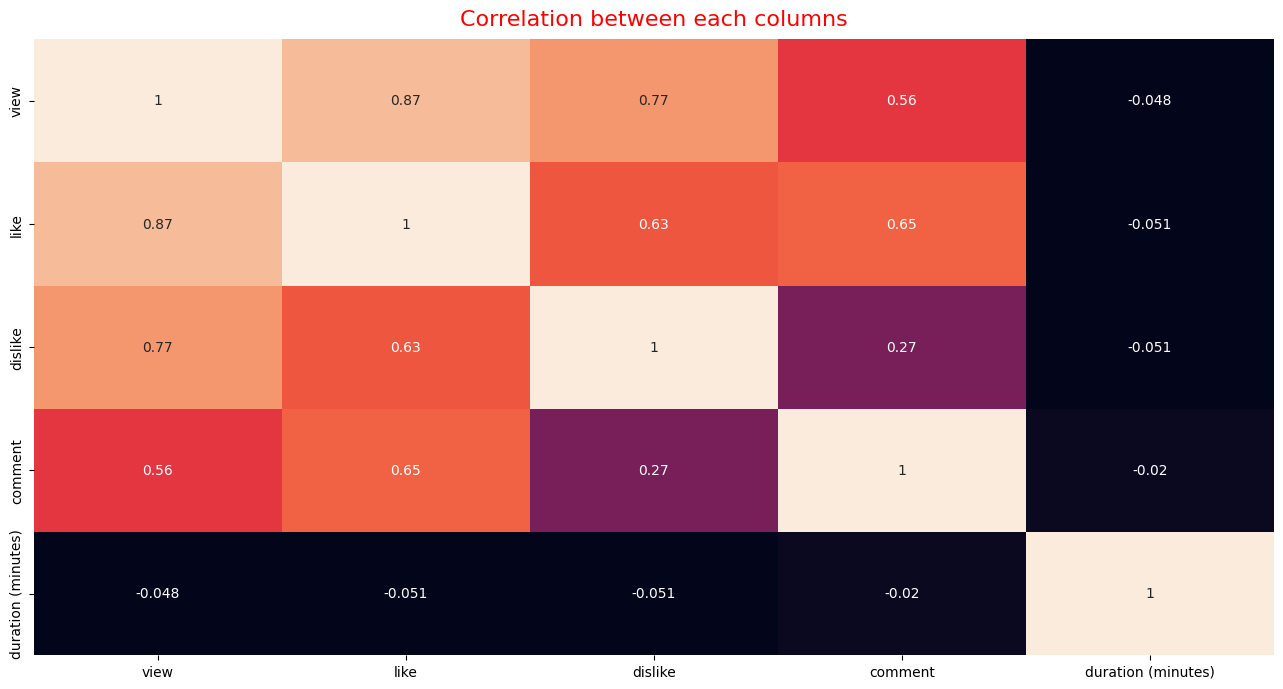

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df3.drop('publish_month',axis=1).corr(),annot=True,cbar=False)
plt.title('Correlation between each columns',c='r',fontsize=16,pad=10)
plt.show()

In [ ]:
df4 = df3.copy()
df4 = df4.groupby('publish_month').mean()
df4 = df4.sort_values('view',ascending=False)
df4

<ipython-input-32-ef4f5f8ee163>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df4.groupby('publish_month').mean()


,view,like,dislike,comment,duration (minutes)
publish_month,,,,,
1,4.890957e+06,252205.418182,5307.818182,26118.581818,12.131636
5,3.978469e+06,172459.026455,4439.087831,20513.292063,15.121196
10,3.525266e+06,146211.900165,5404.647690,6587.696370,37.579670
6,3.314909e+06,124466.356343,4045.262127,11704.681903,24.863340
11,3.133207e+06,134230.202412,4577.285960,4941.707149,24.880448
9,2.961139e+06,154167.306581,4279.540128,8194.401284,24.430482
8,2.682472e+06,113618.606035,3631.636211,7045.461861,16.031157
7,2.470839e+06,113945.317995,2570.456861,9086.177486,18.793739
3,2.308439e+06,114739.369509,2835.419897,13043.956072,15.508760


there is a huge views on January 2021

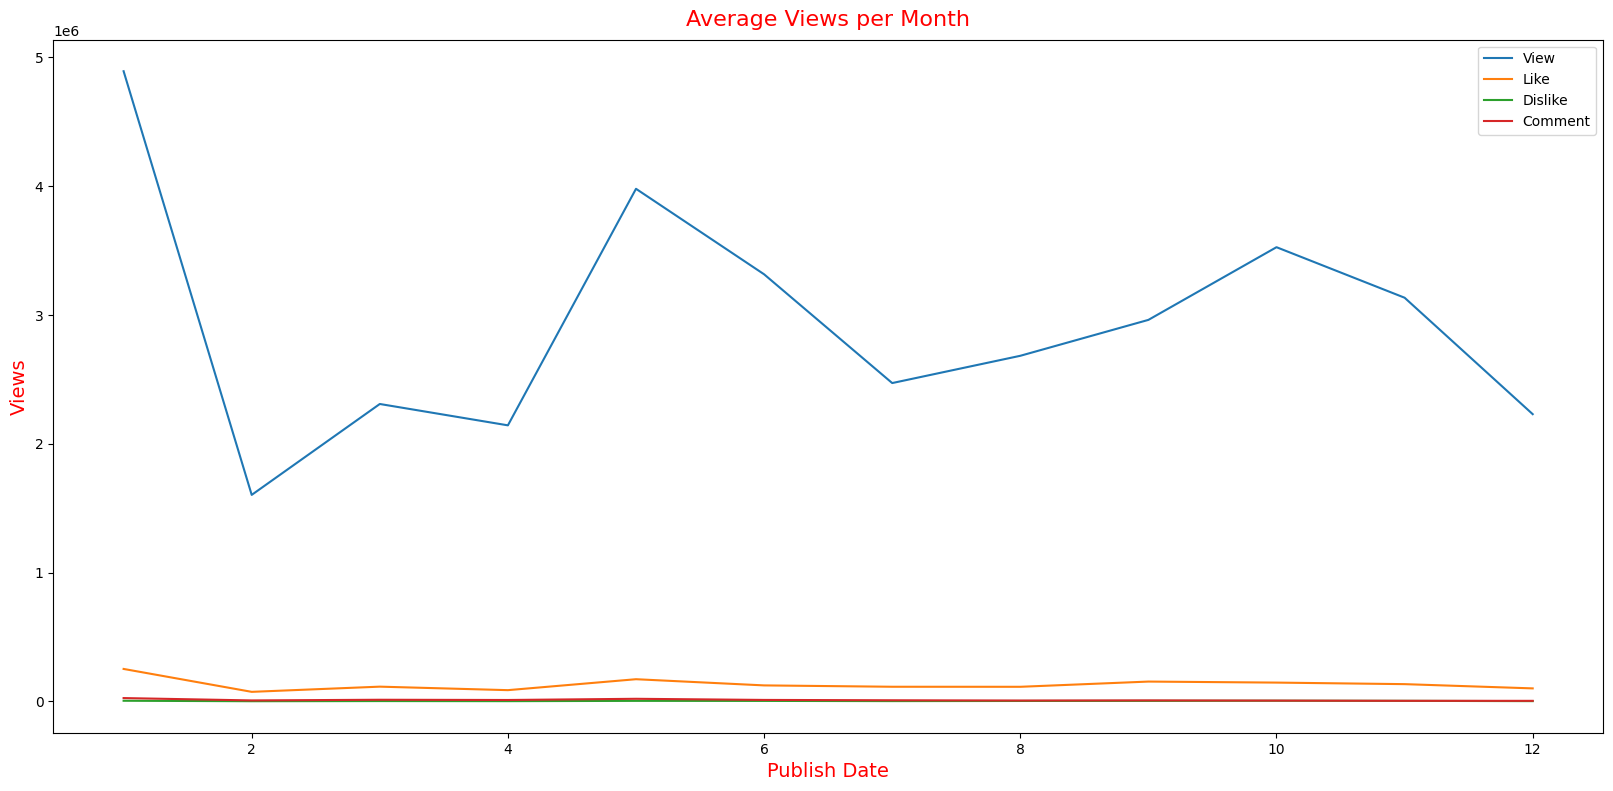

In [ ]:
plt.figure(figsize=(20,9))
sns.lineplot(x=df4.index,y=df4['view'],label='View')
sns.lineplot(x=df4.index,y=df4['like'],label='Like')
sns.lineplot(x=df4.index,y=df4['dislike'],label='Dislike')
sns.lineplot(x=df4.index,y=df4['comment'],label='Comment')
plt.title('Average Views per Month',c='r',fontsize=16,pad=10)
plt.xlabel(xlabel='Publish Date',c='r',fontsize=14)
plt.ylabel(ylabel='Views',c='r',fontsize=14)
plt.show()

In [ ]:
top_10_month_1 = df3.loc[df3['publish_month']==1].sort_values('view',ascending=False).head(10)
top_10_month_1

,publish_time,publish_month,title,channel_name,view,like,dislike,comment,duration (minutes)
1161,2021-01-25 15:00:10,1,ROSÉ - COMING SOON TEASER,BLACKPINK,38401820.0,3696848.0,47783.0,606026.0,0.57
1794,2021-01-27 09:00:00,1,[MV] IU(아이유) _ Celebrity,1theK (원더케이),34990982.0,1916177.0,21357.0,102631.0,3.32
1756,2021-01-28 07:21:39,1,BLACKPINK: Pretty Savage,The Late Late Show with James Corden,31904101.0,1862902.0,37619.0,112151.0,3.65
1780,2021-01-24 09:00:13,1,"SING-OFF TIKTOK SONGS Part III (Papi Chulo, Po...",Reza Darmawangsa,13355549.0,644489.0,9817.0,29479.0,4.62
1185,2021-01-23 09:50:34,1,🔴 كوكا كولا ، فانتا مختلفة ، إم تي إن ديو ، بي...,13 Things vs Experiment,11823920.0,38721.0,19215.0,3599.0,0.92
1964,2021-01-27 15:00:32,1,"TANTANGAN 100 LAPIS! Makeup, Hairspray, Lakban...",123 GO! CHALLENGE Indonesian,10294731.0,57294.0,15396.0,3447.0,10.05
1992,2021-01-25 22:03:49,1,KIAT TERKEREN AGAR POPULER DI SEKOLAH || Kiat-...,123 GO! Indonesian,9610492.0,60701.0,12227.0,3913.0,10.52
1922,2021-01-28 07:00:07,1,LEPAS HIJAB! RACHEL VENNYA BUKA SUARA KE BOY W...,Boy William,8410748.0,335029.0,14580.0,16848.0,11.73
551,2021-01-31 07:59:58,1,[BANGTAN BOMB] SUGA's Daechwita Sword Dance Pr...,BANGTANTV,8194666.0,1702436.0,4341.0,82782.0,4.12
582,2021-01-22 10:00:22,1,"Tiara Andini, Arsy Widianto - Cintanya Aku (Of...",TiaraAndiniVEVO,6966792.0,277201.0,10693.0,138176.0,4.50


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core

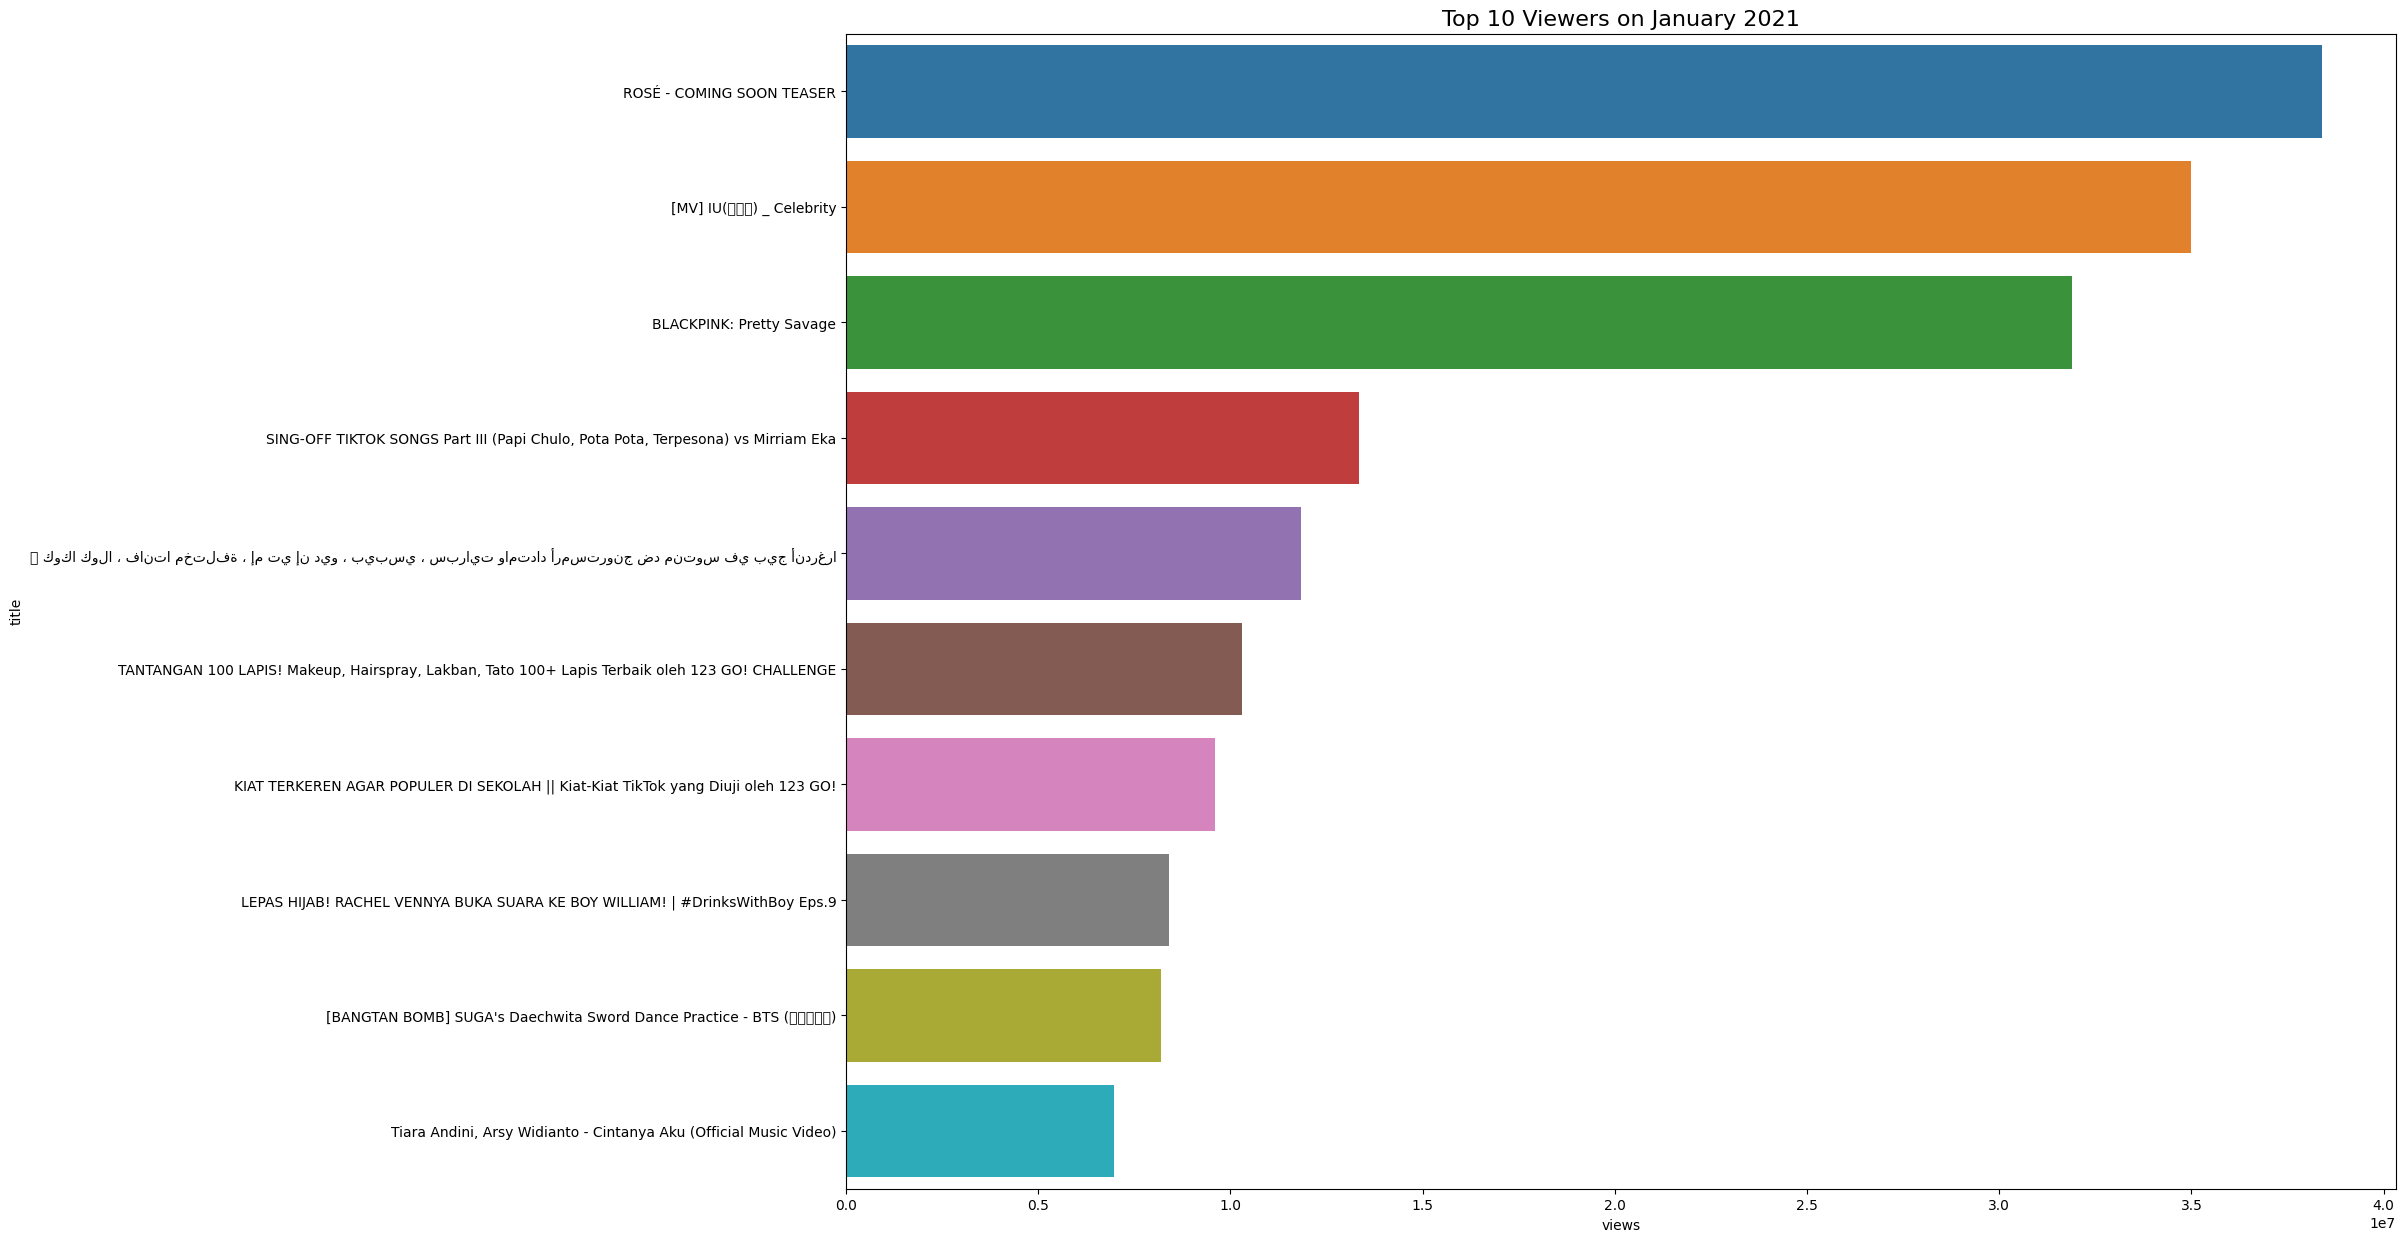

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(y=top_10_month_1['title'],x=top_10_month_1['view'])
plt.title('Top 10 Viewers on January 2021',size=16)
plt.xlabel('views')
plt.show()

it happened because single album from Rose and also new album for IU and blackpink

now lets go check on month may

In [ ]:
top_5_month_5 = df3.loc[df3['publish_month']==5].sort_values('view',ascending=False).head(5)
top_5_month_5

,publish_time,publish_month,title,channel_name,view,like,dislike,comment,duration (minutes)
17506,2021-05-21 03:46:13,5,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,335957560.0,17005260.0,225569.0,7195733.0,3.05
15906,2021-05-15 18:29:43,5,HOW TO GO THROUGH THE DRESS CODE 👗🎀💂‍♂️|| #SHORTS,5-Minute Crafts FAMILY,144709142.0,3225341.0,179721.0,18504.0,0.67
15505,2021-05-14 04:00:16,5,Bella Poarch - Build a B*tch (Official Music V...,Bella Poarch,132510456.0,7019435.0,231317.0,379871.0,2.83
15095,2021-05-10 09:02:33,5,NCT DREAM 엔시티 드림 '맛 (Hot Sauce)' MV,SMTOWN,89983562.0,2719547.0,41099.0,1011673.0,3.53
17109,2021-05-27 02:00:04,5,HOW CRYPTOCURRENCY WORKS 💸👨🏻‍💻,Alan Chikin Chow,89476389.0,3678950.0,151715.0,7075.0,0.65


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyt

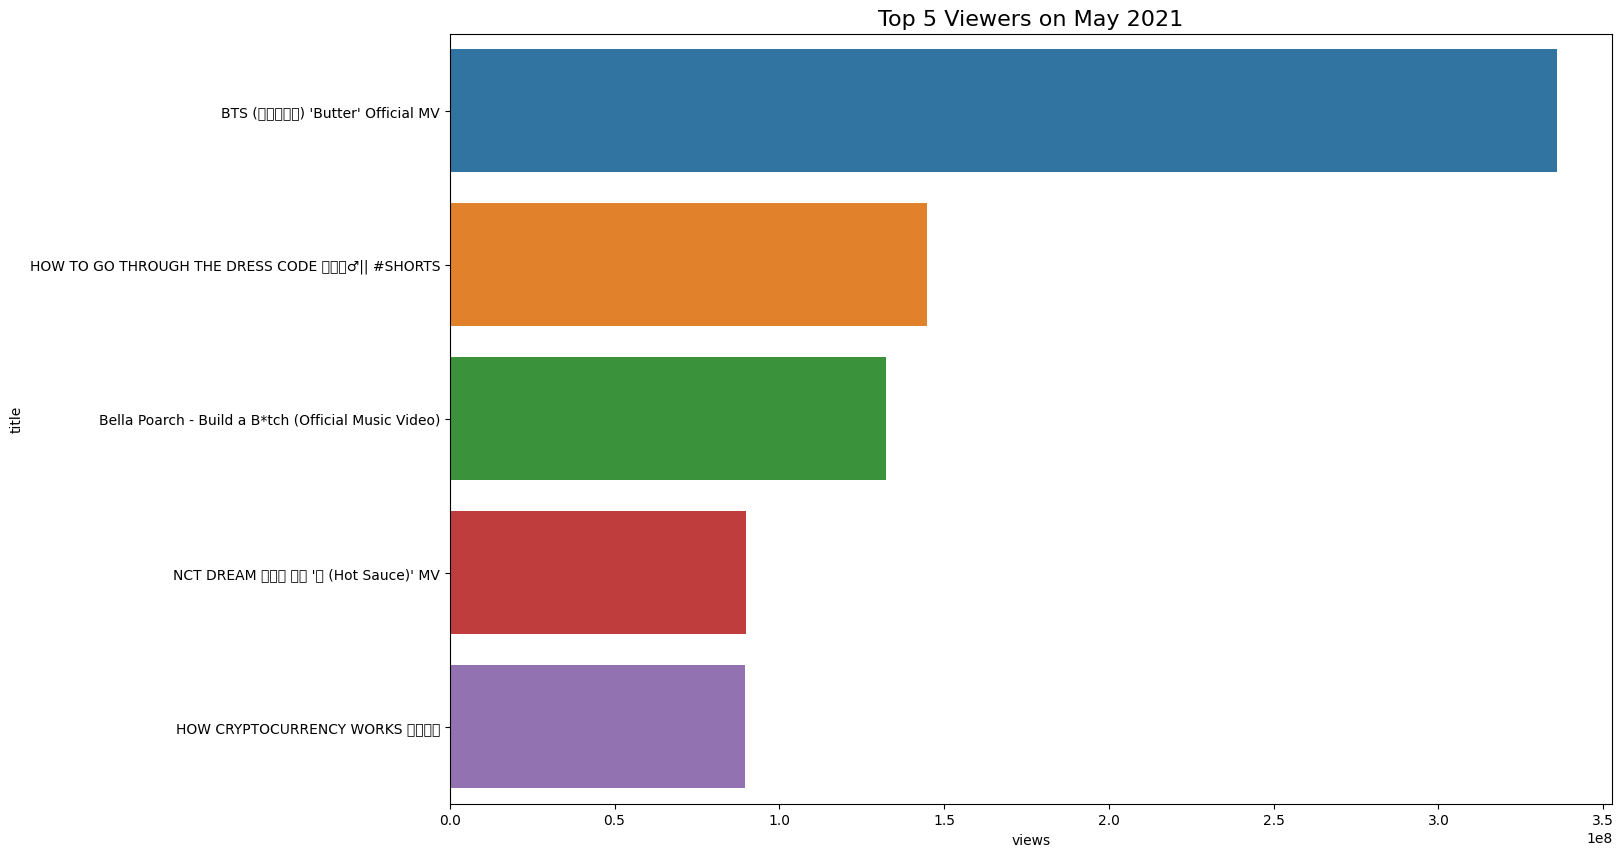

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(y=top_5_month_5['title'],x=top_5_month_5['view'])
plt.title('Top 5 Viewers on May 2021',size=16)
plt.xlabel('views')
plt.show()

BTS also has new album that has huge views

In [ ]:
top_channel_by_views = df3.groupby('channel_name').agg({'view':'sum','like':'sum','dislike':'sum','comment':'sum','title':'count'})
top_channel_by_views = top_channel_by_views.sort_values('view',ascending=False)
top_channel_by_views['view']=top_channel_by_views['view'].apply(lambda x:int(x))
top_channel_by_views = top_channel_by_views.head(10)
top_channel_by_views

,view,like,dislike,comment,title
channel_name,,,,,
HYBE LABELS,1047764936,86069207.0,742939.0,17512922.0,32
Tsuriki Show,1016259649,23687922.0,1493158.0,74396.0,21
BANGTANTV,789487259,111700247.0,819655.0,4553434.0,52
SMTOWN,777365293,36269300.0,575955.0,8971693.0,32
BLACKPINK,747295870,60290822.0,732338.0,7336283.0,24
JYP Entertainment,613879750,27361560.0,380305.0,4865781.0,25
SMOL,584973386,25799846.0,1444400.0,32068.0,20
MrBeast,522103659,33644303.0,295603.0,1626831.0,14
Deddy Corbuzier,433069393,15269511.0,563021.0,2325524.0,109


In [ ]:
top_channel_by_views_1 = df3.groupby('title').agg({'view':'sum'})
top_channel_by_views_1 = top_channel_by_views_1.sort_values('view',ascending=False)
top_channel_by_views_1['view']=top_channel_by_views_1['view'].apply(lambda x:int(x))
top_channel_by_views_1 = top_channel_by_views_1.head(10)
top_channel_by_views_1

,view
title,
BTS (방탄소년단) 'Butter' Official MV,335957560
LISA - 'LALISA' M/V,219887688
This isn't David Copperfield Magic trick😂 #shorts by Tsuriki Show,215697929
BTS (방탄소년단) 'Permission to Dance' Official MV,213489405
JETSKI WAX PRANK!! 🤣 - #Shorts,184348442
Guess the sound challenge🎵 #shorts,165484945
Exercise Ball Racing Is AWESOME 🔴🟡,159722878
"$456,000 Squid Game In Real Life!",156698111
FUNNY DIY FOOT SOAP 🧼🦶😂 || #SHORTS,153323761


In [ ]:
top_channel_by_views_2 = df3.groupby('title').agg({'view':'sum','like':'sum','dislike':'sum','comment':'sum'})
top_channel_by_views_2 = top_channel_by_views_2.sort_values('view',ascending=False)
top_channel_by_views_2['view']=top_channel_by_views_2['view'].apply(lambda x:int(x))
top_channel_by_views_2 = top_channel_by_views_2.head(10)
top_channel_by_views_2

,view,like,dislike,comment
title,,,,
BTS (방탄소년단) 'Butter' Official MV,335957560,17005260.0,225569.0,7195733.0
LISA - 'LALISA' M/V,219887688,12712334.0,173082.0,2555127.0
This isn't David Copperfield Magic trick😂 #shorts by Tsuriki Show,215697929,5485332.0,220955.0,20200.0
BTS (방탄소년단) 'Permission to Dance' Official MV,213489405,13068100.0,151935.0,2966433.0
JETSKI WAX PRANK!! 🤣 - #Shorts,184348442,4724594.0,149702.0,25355.0
Guess the sound challenge🎵 #shorts,165484945,4291455.0,255423.0,8472.0
Exercise Ball Racing Is AWESOME 🔴🟡,159722878,5533042.0,131410.0,4541.0
"$456,000 Squid Game In Real Life!",156698111,11613809.0,80917.0,557360.0
FUNNY DIY FOOT SOAP 🧼🦶😂 || #SHORTS,153323761,3904015.0,190604.0,23306.0


In [ ]:
fig = px.bar(data_frame=top_channel_by_views.iloc[:,-1:],width=1000,color=top_channel_by_views.index,text_auto=True,title='Total Uploads')
fig.update_layout(showlegend=False,yaxis_title='Uploads')
fig.show()

In [ ]:
fig = px.bar(data_frame=top_channel_by_views.iloc[:,1:-1],barmode='group',width=1000,text_auto=True)
fig.show()

In [ ]:
fig = px.bar(data_frame=top_channel_by_views.iloc[:,:1],color=top_channel_by_views.index,text_auto=True,title='Total Viewers',width=1000)
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
text = ""
for i in range(df3.shape[0]):
    text += df3.iloc[i]['title']

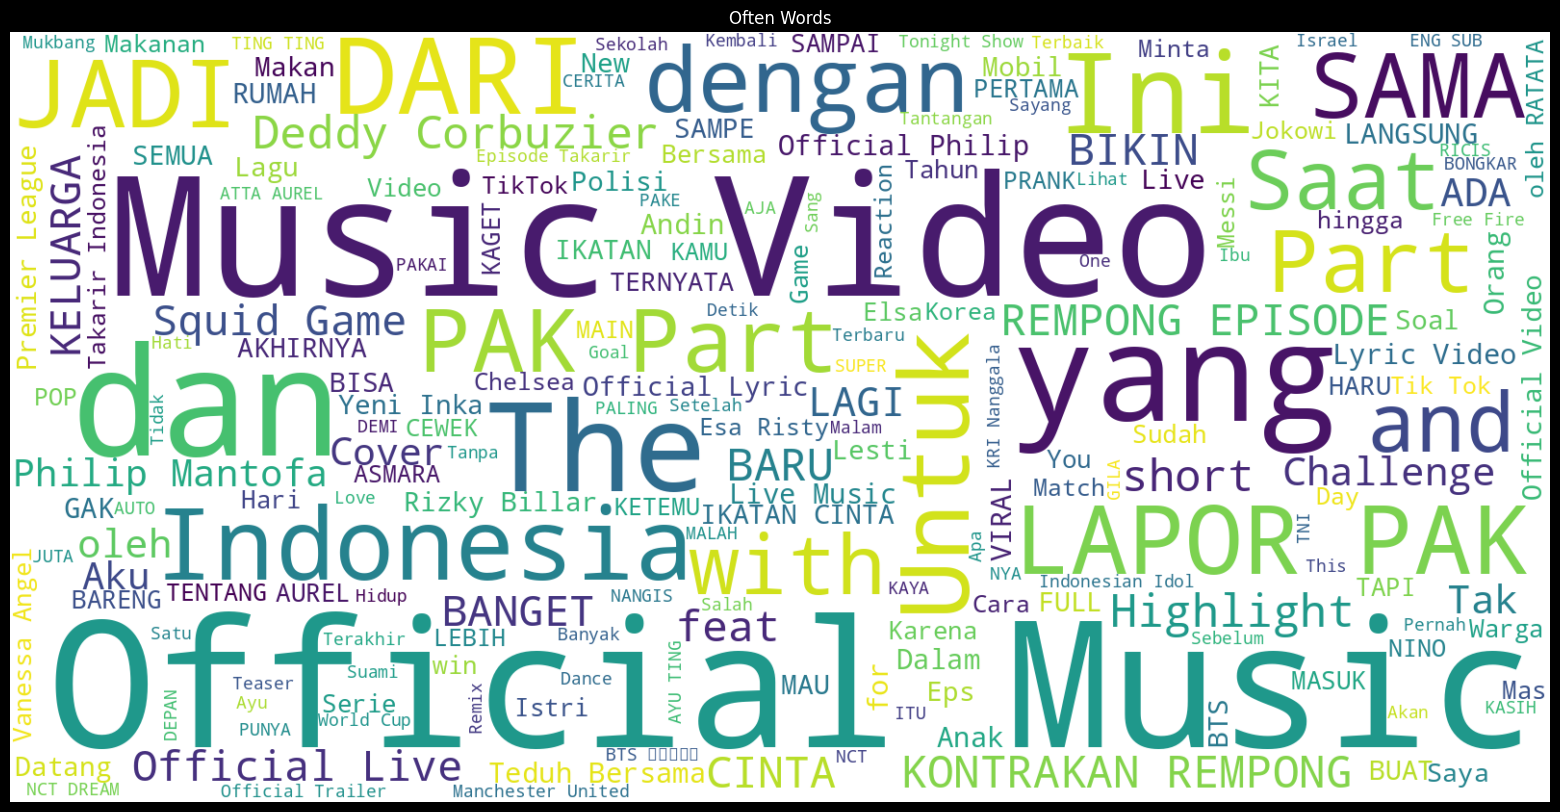

In [ ]:
wordcloud = WordCloud(background_color='white',width=1600,height=800,stopwords='indonesian',min_word_length=3,collocations=True).generate(text)
plt.figure(figsize=(20,10),facecolor='k')
plt.axis("off")
plt.title('Often Words',color='white')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()